In [1]:
from IPython.display import Image

# 1. 토크나이징 (전처리, vocab만들기, 토크나이즈하기)   


   
   
      
      
### 1) 지도학습기반 토크나이징    
   
      
      konlpy, khaii    >>> 형태소분석1  (국어학적 형태소)   

### 2) 비지도학습 기반 토크나이징    
   
      
      soynlp, sentence piece(BPE)  >>> 형태소분석2 (통계기반으로 형태소를 새로 정의)




   

# 2. 임베딩(벡터라이징) =  분산표현 
### >>>말뭉치의 통계적 패턴을 벡터에 넣는 것   

(일단 단어를 벡터로 만들기만 하면 코사인 유사도를 구할 수 있다) 

## 임베딩(분산표현) 방법

### 방법1 시소러스 
사례)워드넷

### 방법2 분포가설 사용

**(1) 통계기반기법** : 빈도frequency기반, 타겟 단어 주변에 많이 쓰인 게 뭔지 count, LSA(행렬분해)   

   
      1) 단어수준
      단어-문서행렬(동시발생행렬) :   <밑시딥2권 ch2>
      PMI, PPMI행렬(단어-문맥행렬)                    <밑시딥2권 ch2>
      LSA(잠재의미분석 : SVD시행한 축소된 행렬에서 '단어'에 대응하는 벡터를 취해 문서임베딩을 만듦
          특이값 분해 SVD, Truncated SVD (행렬분해 대상  : 동시발생행렬, PMI, PPMI)   <밑시딥2권 ch2>
      
                                                        TF-IDF 행렬분해 <백오브워즈 가정>       
                                                        GloVe ( PPMI 단어-문맥 행렬분해)
                                                        Swivel (PMI 행렬분해)
                                                    
      2) 문장수준
      LSA (단어-문서행렬, TF-IDF 행렬에 SVD시행한 축소된 행렬에서 '문서'에 대응하는 벡터를 취해 문서임베딩을 만듦

**(2) 추론기반기법** : 예측(추론)기반, 타겟단어 주변에 같이 쓰인 게 뭔지 inference, 뉴럴넷 사용    
   
      
      1) 단어수준 (n-gram) 
      Word2vec :  토크나이징(konlpy-mecab), 맥락-타깃단어 만든 후 원핫벡터로 변환후 학습
           [skip-gram은 PMI와 관련이 깊다]   
         
      2) 자소수준 (n-gram) 
      FastText : 토크나이징(konlpy-mecab + soynlp 136p) 한 다음 사용 가능 

      3) 문장수준, 예측기반, 어떤 순서 order 로 쓰였는지, 뉴럴네트워크 사용   
      Doc2vec, ELMo, 뉴럴넷
      BERT, GPT, 뉴럴넷{트랜스포머}

      4) 문장수준, 토픽기반, 주어진 문서에 잠재된 주제 추론
      LDA(잠재 디리클레 할당), 확률모델


### 통계기반기법과 추론기반기법 비교

**학습속도**
   
통계기반 : 풀배치학습 ㅡ 말뭉치 전체 통계를 이용해 단 1회의 SVD 등으로 단어의 분산표현을 얻을 수 있다. 대신 말뭉치가 커지면 연산 비효율    
추론기반 : 미니배치학습 ㅡ 말뭉치가 커도 신경망을 사용해 데이터의 일부를 순차적으로 학습 가능, GPU를 이용한 병렬계산을 통해 학습속도도 빠르게 

**학습효율**   
통계기반 : 말뭉치에 단어를 새로 추가할 경우 동시발생 행렬을 다시 만들고 SVD를 다시 해야한다.   
추론기반 : 기존에 학습한 가중치를 초기값으로 사용해 다시 학습하면 된다

**분산표현의 성격**   
통계기반 : 주로 단어의 유사성이 인코딩   
추론기반 : 단어의 유사성 + 단어 사이의 패턴 (유추문제 풀이 가능)   
통계기반과 추론기반은 단어의 유사성 관련 작업의 경우 우열이 없다.    


**통계기반 + 추론기반**   
스킵그램 + 네거티브샘플링 모델 : 말뭉치 전체의 동시발생행렬에 특수한 행렬분해를 적용한 것과 같다   
GloVe : 말뭉치 전체 통계정보를 손실함수에 도입해 미니배치 학습을 하는 것

# 분산표현 = 임베딩   
   
   

일단 단어를 벡터로 만들기만 하면 코사인 유사도를 구할 수 있다   
   

## 방법1 시소러스 

**사례)워드넷**

## 방법2 분포가설 사용

### (1) 통계기반기법
1) **동시발생행렬** : 단어-문서행렬 
2) **PMI, PPMI 행렬** 
3) **특이값 분해 SVD, Truncated SVD** (행렬분해 대상 - 동시발생행렬 , PMI, PPMI...)

# (2) 추론기반 기법

### CBOW : 주변의 맥락단어를 가지고 타겟 위치에 어떤 단어가 들어갈지 추측   
### Skip-gram : 타깃단어를 가지고 주변의 맥락 위치에 어떤 단어가 들어갈지 추측 

# 단어의 출현 패턴을 학습  
### :  사용한 말뭉치가 다르면 학습 후 얻게되는 분산표현도 달라진다

모델은 맥락정보를 입력받아 출현할 수 있는 각 단어의 출현확률을 출력한다   
말뭉치를 사용해 모델이 올바른 추측을 내놓도록 학습!

### 학습 순서   
1) 맥락, 타겟단어를 고정길이 벡터로 변환 : 원핫 인코딩   (**질문, 원핫 대신 PPMI 행렬을 가지고 word2vec을 학습 시키면 안될까??????????????????????????????????????**)   
   
      
      
총 어휘수 N만큼의 원소를 갖는 벡터를 어휘수 N만큼 준비한 뒤, 인덱스가 단어 ID와 같은 원소를 1, 나머지는 모두 0으로 설정    

    

2) CBOW 모델 구현   
3) 학습코드 구현

## 0) 개요

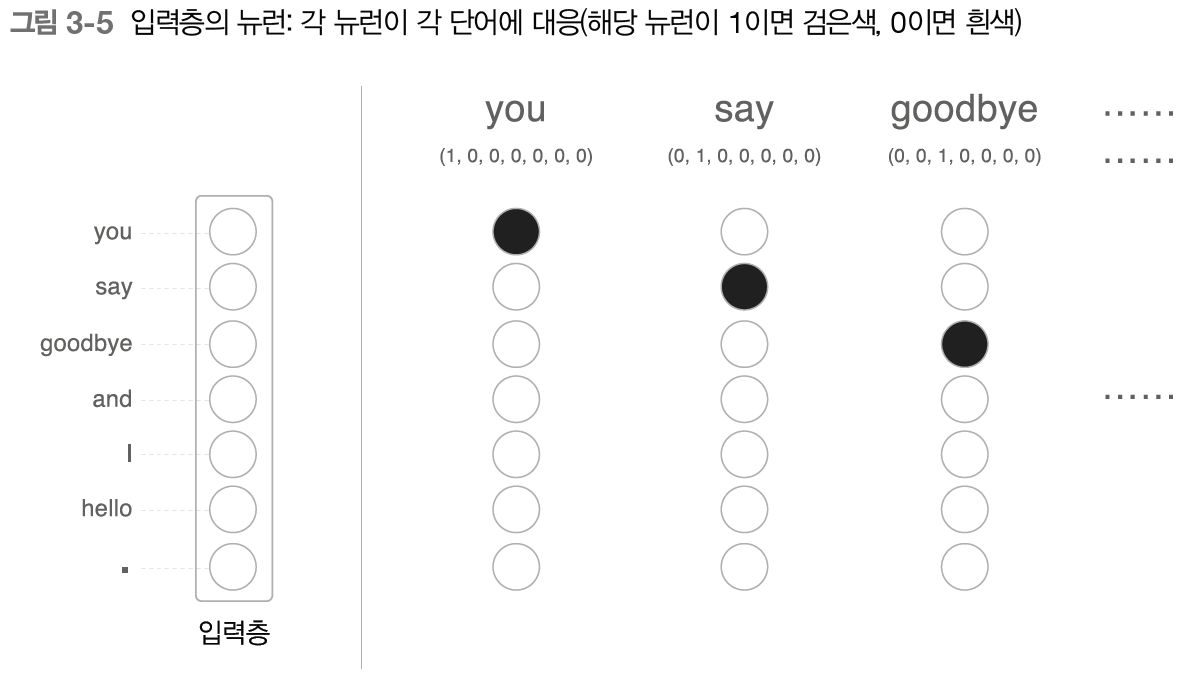

In [23]:
Image("1.png", width=1000, height=800)

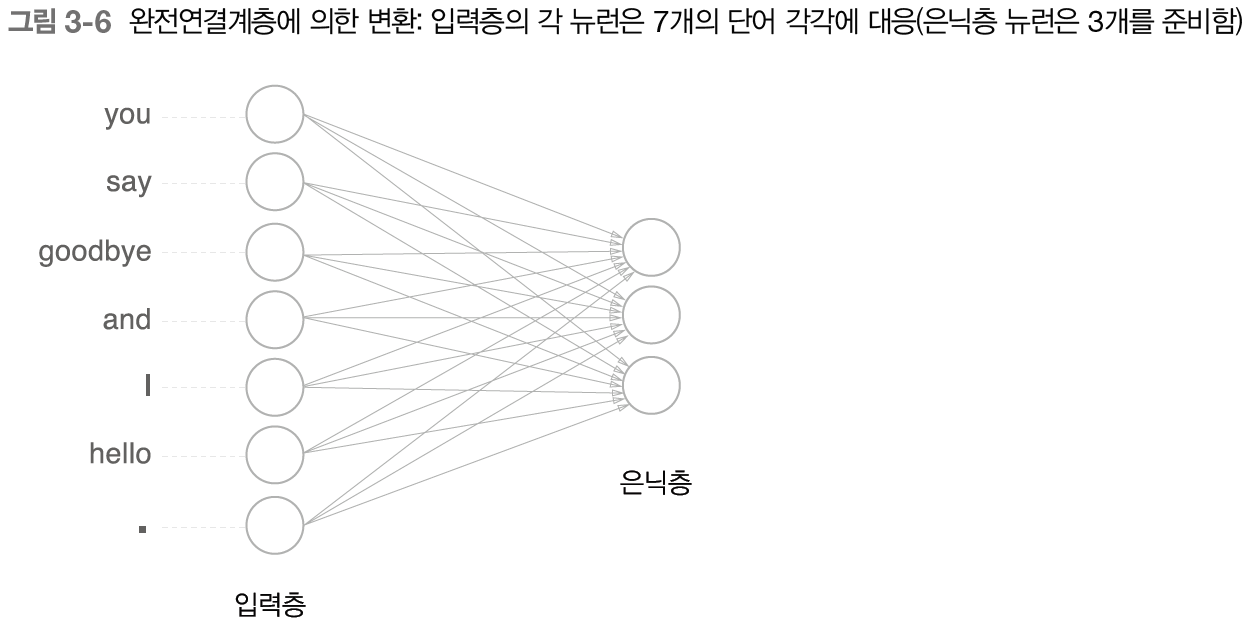

In [15]:
Image("2.png",width=1000, height=800)

가중치 행렬은 7 x 3   


In [8]:
# 첫번째 단어 you의 벡터를 입력값으로 주어 첫번째 은닉층을 통과시킨 결과는
# 가중치 행렬 7 x 3의 첫번째 행벡터 하나를 뽑아낸 결과와 같다.
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]])  # 입력
W = np.random.randn(7, 3)              # 가중치
h = np.matmul(c, W)                    # 중간 노드
print(h)

[[-0.25677982  0.16313758 -1.73826797]]


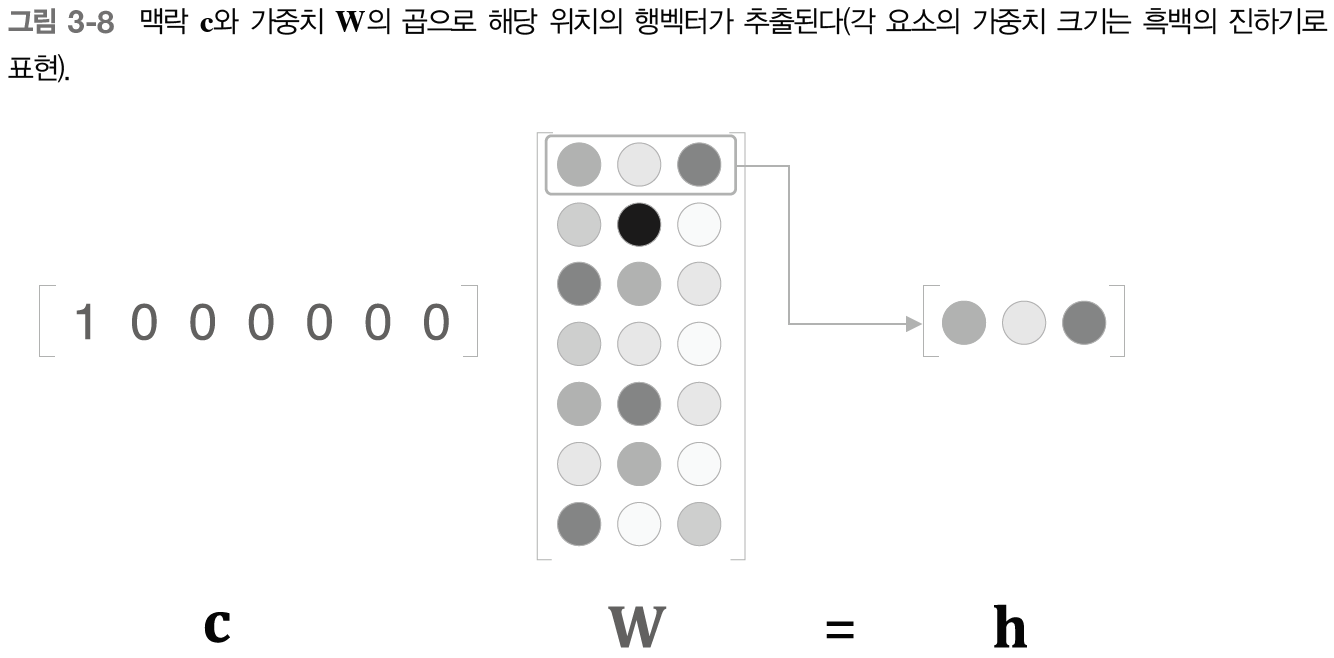

In [16]:
Image("3.png",width=1000, height=800)

 위 코드를 Matmul 클래스로 다시 짜보면

In [10]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul

c = np.array([[1, 0, 0, 0, 0, 0, 0]])  # 입력
W = np.random.randn(7, 3)             
layer = MatMul(W)        # Matmul 클래스의 인스턴스 layer를 만든 다음 W를 인자로 주어 초기화시키고
h = layer.forward(c)                    # Matmul 클래스의 forward 메서드를 실행 
print(h)

[[ 1.46855299 -1.14450252 -0.60635663]]


    CBOW의 입력은 맥락단어다.   
      따라서 입력이 2개면 입력층도 2개   
      다시 말해 맥락에 포함시킬 단어가 N개라면 입력층도 N개   
      
    입력층들의 가중치는 똑같이 초기화한다.   
      
   입력층이 여러 개면 전체를 평균한 값이 은닉층의 뉴런   
     
     <<< 은닉층의 뉴런수를 입력층의 뉴런수보다 적게 하는 게 핵심        
         = 가중치 행렬의 열수를 행수보다 적게    
         = 단어 벡처의 차원수를 전체 말뭉치 수보다 적게
           그래야 필요한 정보를 간결하게 담은 밀집 벡터표현이 되므로 
           
    출력층의 점수에 softmax를 적용해 확률을 얻는다    
      <<< CBOW 모델은 활성화 함수를 사용하지 않는다
      
    Win 가중치 행렬의 각 행벡터가 바로 해당 단어의 분산표현   
      <<< Wout을 써도 되고, 둘을 더해서 써도 되는데
          Win만 쓰는 게 일반적
      <<< GloVe에서는 둘을 더했을 때 좋은 결과가 나왔다

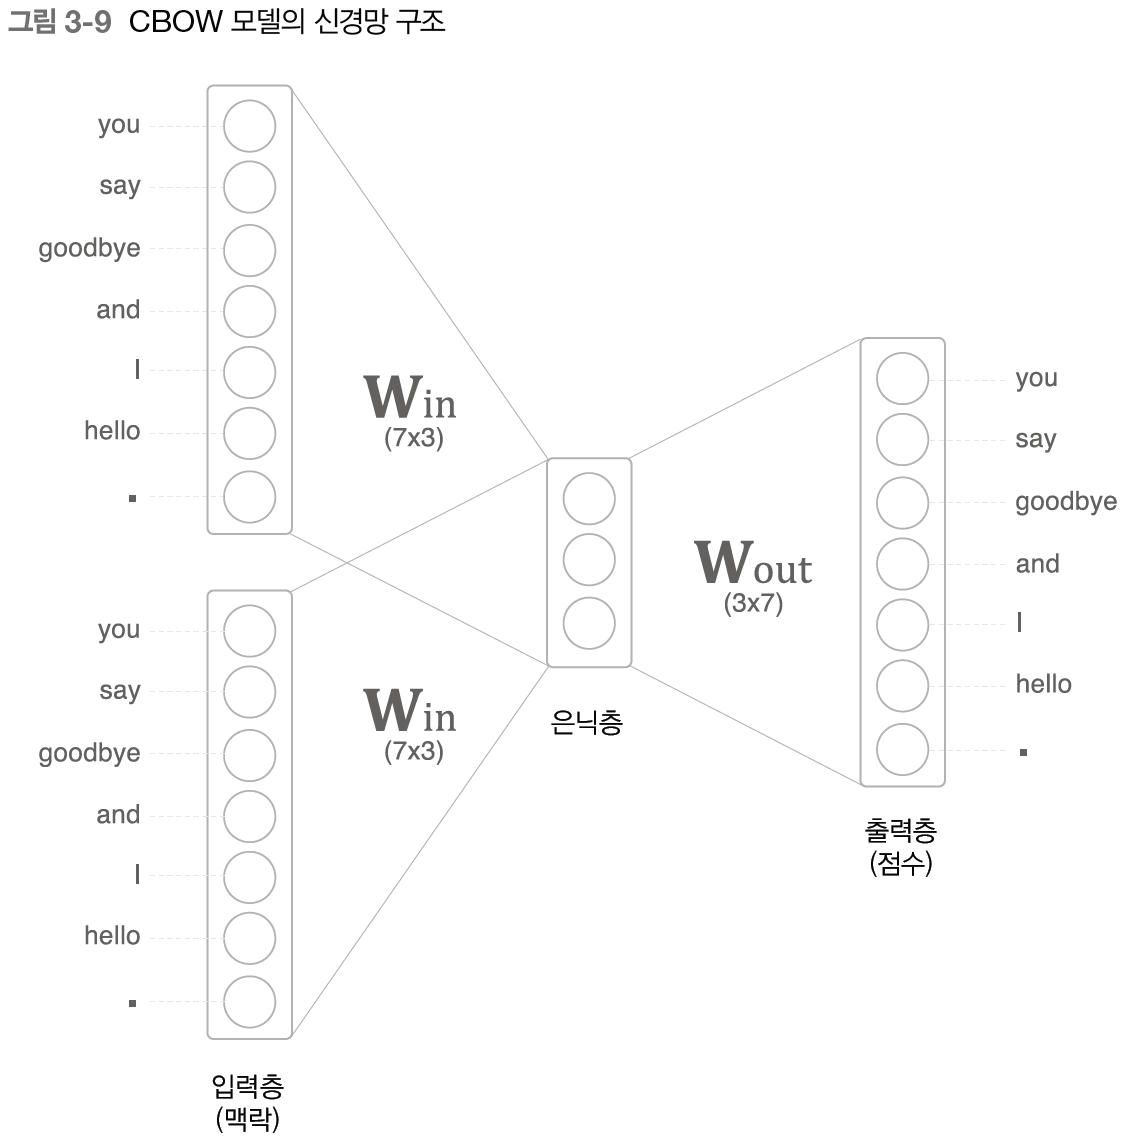

In [20]:
Image("4.png",width=800, height=600)

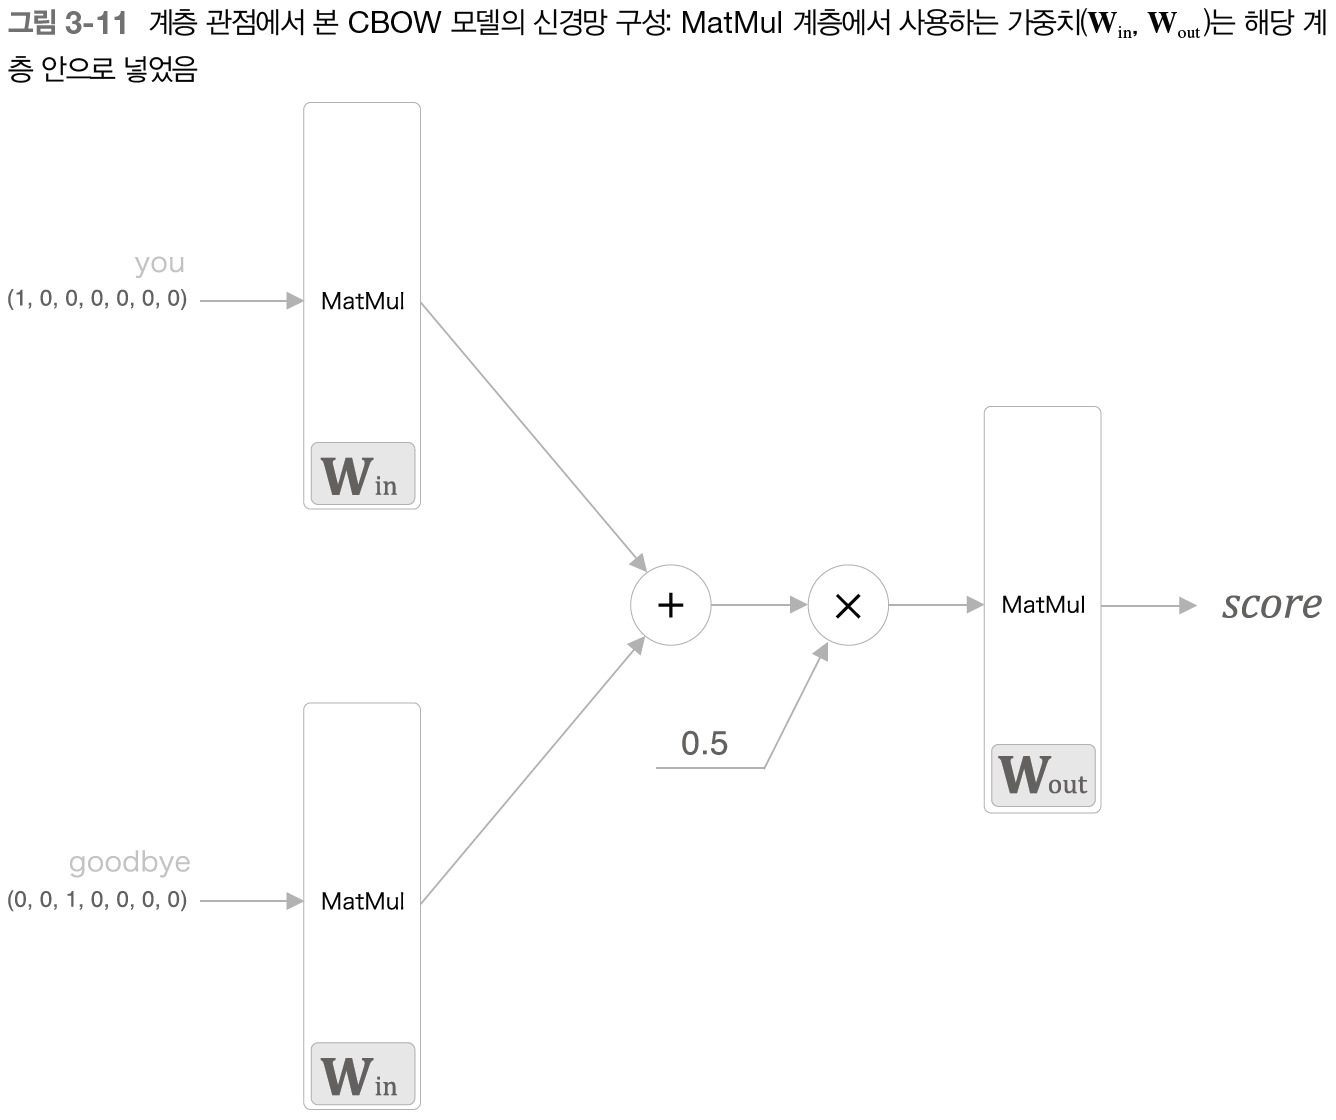

In [21]:
Image("5.png",width=800, height=600)

### CBOW 추론 처리 코드 구현

In [22]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)


[[ 0.31900196 -0.12144205  0.09966265  1.72835932 -0.53067326  0.56714959
  -0.74119959]]


### CBOW 모델 학습

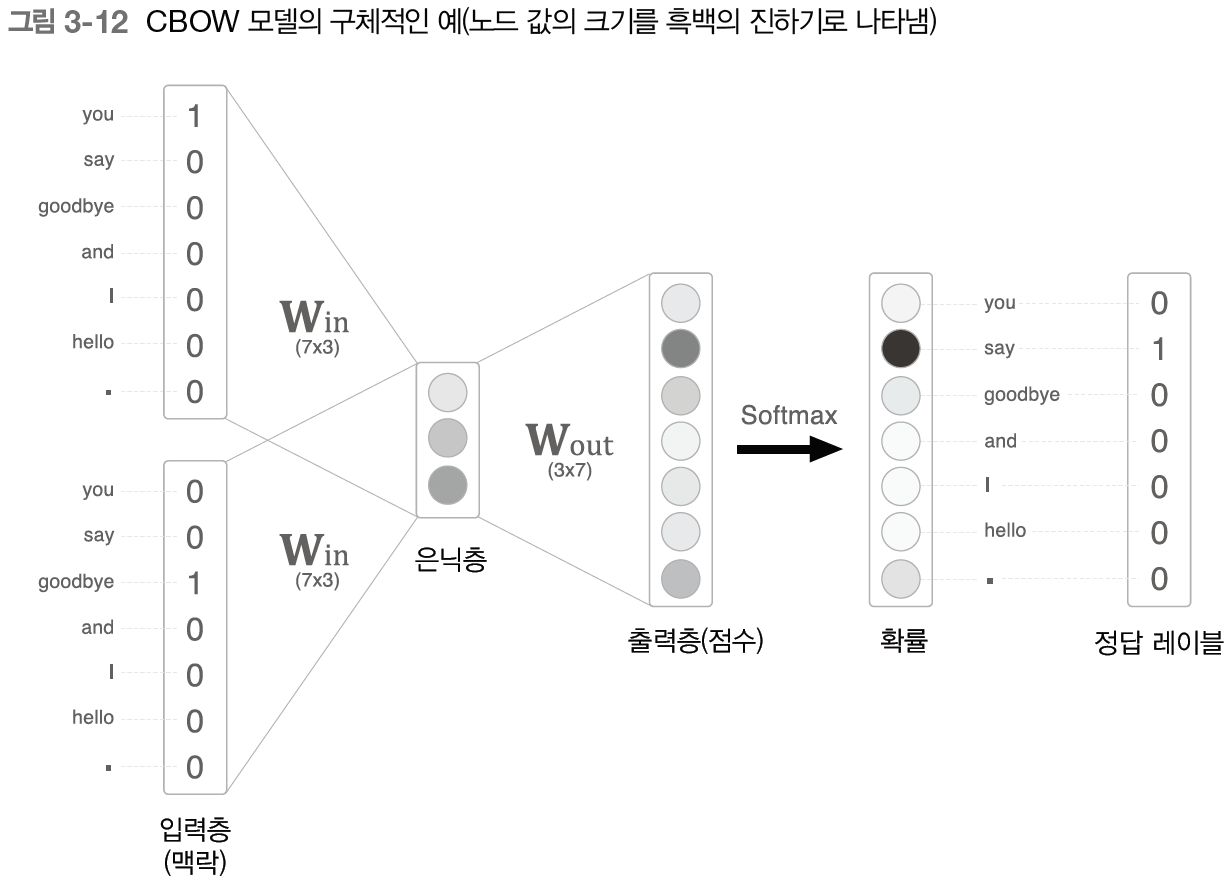

In [24]:
Image("6.png",width=800, height=600)

CBOW 모델은 다중 클래스 분류 신경망이다   
따라서 소프트맥스를 이용해 확률로 변환한 값과 정답레이블로부터 교차엔트로피로스를 구하고   
그 값을 손실로 사용해 학습을 진행한다.

### 1) 전처리, vocab, 토크나이징 >>> 맥락 단어(입력값)-타깃 단어(레이블) 생성, 원핫인코딩 벡터로 변환 

In [30]:
import sys
sys.path.append('..')
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


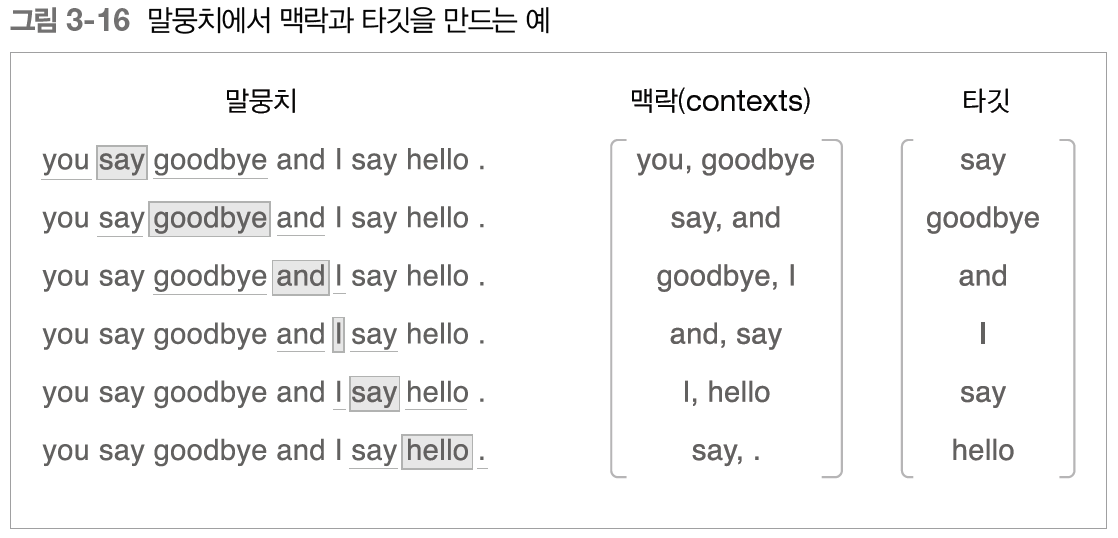

In [28]:
Image("7.png",width=800, height=600)

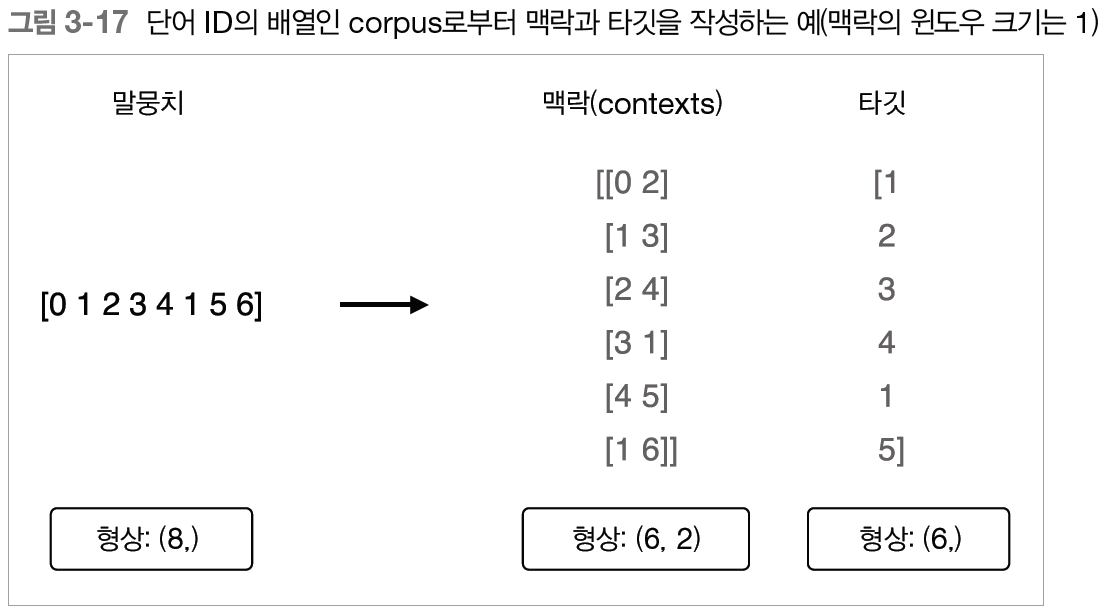

In [29]:
Image("8.png",width=800, height=600)

In [41]:
corpus[1:-1]

array([1, 2, 3, 4, 1, 5])

In [42]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [43]:
for i in range(-1,2):
    print(i)

-1
0
1


In [6]:
def create_contexts_target(corpus, window_size=1):  # 맥락과 타깃 생성
    '''
    corpus: 말뭉치(단어 ID 목록)
    window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    '''
    target = corpus[window_size:-window_size]  # 말뭉치의 맨앞, 맨뒤 단어를 제외시킨 배열이 타겟 
    contexts = []

    for idx in range(window_size, len(corpus)-window_size): # (1, 8-1) : 1 ~ 6
        cs = []
        for t in range(-window_size, window_size + 1): # (-1, 1+1) : -1 ~ 1 >>> 타겟단어 좌우 -1, +1
            if t == 0:                  # 타겟단어 위치를 가리키는 인덱스 0은 건너 뛰고 
                continue
            cs.append(corpus[idx + t])  # 1-1, 1+1 / 2-1, 2+1 / ...
        contexts.append(cs)             # (0,2) , (1,3), ...

    return np.array(contexts), np.array(target)

In [45]:
contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]


In [46]:
print(target)

[1 2 3 4 1 5]


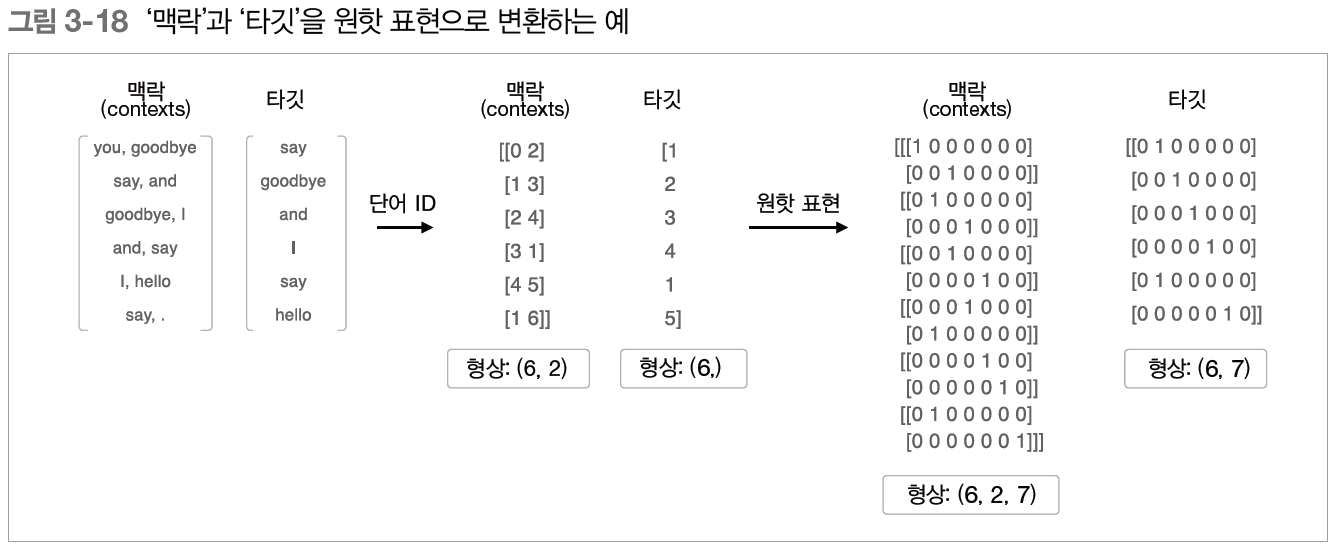

In [48]:
Image("9.png",width=1000, height=800)

In [7]:
def convert_one_hot(corpus, vocab_size):  # 원핫 표현으로 변환
    '''
    corpus: 단어 ID 목록(1차원 또는 2차원 넘파이 배열)
    vocab_size: 어휘 수
     원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]   

    if corpus.ndim == 1:                                       # 단어 단위로 corpus를 만든 경우
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)    # 말뭉치 사이즈(단어 개수) x vocab 사이즈 영행렬  
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:                                     # 문장 단위로 corpus를 만든 경우 
        C = corpus.shape[1]                                    # 문장의 차원(단어 수) 
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32) # 말뭉치 사이즈(문장 개수) x 문장의 차원수(단어수) x vocab 사이즈
        for idx_0, word_ids in enumerate(corpus):              # 문장하나씩 꺼내서 인덱스 매기고 
            for idx_1, word_id in enumerate(word_ids):         # 문장 안의 단어 하나씩 꺼내서 인덱스 매긴다음 
                one_hot[idx_0, idx_1, word_id] = 1             # N번째 문장의 C번째 단어 원핫으로 변환 

    return one_hot


In [58]:
vocab_size = 7
s = np.array([[0, 1, 2, 3, 4, 1, 5, 6],[0, 1, 2, 3, 4, 1, 5, 6]])
s.shape

(2, 8)

In [59]:
N = s.shape[0]   
C = s.shape[1]
C

8

In [60]:
one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
one_hot

array([[[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]]])

In [64]:
for idx_0, word_ids in enumerate(s):
    print(idx_0, word_ids)

0 [0 1 2 3 4 1 5 6]
1 [0 1 2 3 4 1 5 6]


In [68]:
import sys
sys.path.append('..')
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)                   # 전처리, vocab, 토크나이징 

contexts, target = create_contexts_target(corpus, window_size=1)    # 맥락단어, 타깃단어 생성 

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)                        # 타겟단어 원핫 벡터로 변환
contexts = convert_one_hot(contexts, vocab_size)                    # 맥락단어 원핫 벡터로 변환

In [69]:
contexts.shape

(6, 2, 7)

# 2) CBOW 모델 구현

In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):         
        V, H = vocab_size, hidden_size   # vocab 사이즈와 은닉층 뉴런 수(몇 차원의 고정길이 벡터로 만들것인지)를 입력값으로 받는다. 

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')      # = astype(np.float32) 32비트 부동소수점 수 사용  
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)        # 입력층(Matmul 계층)은 맥락단어의 수만큼 만들어야 한다. 
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params     # 아래  MatMul 클래스의 이니셜라이저에 초기화된 가중치와 기울기를  
            self.grads += layer.grads       # SimpleCBOW 클래스의 이니셜라이저에 초기화시킨다. 
            
            # 이 코드에서는 여러 계층에서 같은  가중치를 공유하고 있다. 따라서 self.params에 같은 가중치가 여러개 존재하게 되는데 (137p참고)
            
            # Win이 두개니까!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!????????????????????????????????????????????

            # 이렇게 되면 옵티마이저 처리가 본래 동작과 달라져버린다 (이 책의 구현에선 그렇게 된다)
            # 그래서 Trainer클래스 내부에서 가중치를 업데이트 할 때 가중치의 중복을 없애고
            # 중복되는 가중치들의 기울기를 더하는 작업을 수행한다. remove_duplicate 참고 >>> 맨 아래 Trainer 클래스에 들어있다.
            # 결과적으로 Win을 하나만 남게 되는 건가??????????????????????????????????????????
            
                                        #  def remove_duplicate(params, grads):
                                        #     '''
                                        #     매개변수 배열 중 중복되는 가중치를 하나로 모아
                                        #     그 가중치에 대응하는 기울기를 더한다.
                                        #     '''
                                        #     params, grads = params[:], grads[:]  # copy list

                                        #     while True:
                                        #         find_flg = False
                                        #         L = len(params)

                                        #         for i in range(0, L - 1):
                                        #             for j in range(i + 1, L):
                                        #                 # 가중치 공유 시
                                        #                 if params[i] is params[j]:
                                        #                     grads[i] += grads[j]  # 경사를 더함
                                        #                     find_flg = True
                                        #                     params.pop(j)
                                        #                     grads.pop(j)
                                        #                 # 가중치를 전치행렬로 공유하는 경우(weight tying)
                                        #                 elif params[i].ndim == 2 and params[j].ndim == 2 and \
                                        #                      params[i].T.shape == params[j].shape and np.all(params[i].T == params[j]):
                                        #                     grads[i] += grads[j].T
                                        #                     find_flg = True
                                        #                     params.pop(j)
                                        #                     grads.pop(j)

                                        #                 if find_flg: break
                                        #             if find_flg: break

                                        #         if not find_flg: break

                                        #     return params, grads
        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):            # contexts는 3차원 넘파이배열(6,2,7)
                                                    # 0번째 차원은 한 문장안에 들어있는 모든 타깃에 대해 살펴봐야 하는 전체 맥락쌍의 수 
                                                    # 1번째 차원은 타깃 단어당 살펴보는 맥락단어의 수(윈도우 크기)
                                                    # 2번째 차원은 원핫 벡터 차원수 
                    
        h0 = self.in_layer0.forward(contexts[:, 0]) # 전체 맥락쌍에서 타깃 단어의 왼쪽 맥락단어를 입력값으로 주고 Win과 Matmul 
        h1 = self.in_layer1.forward(contexts[:, 1]) # 타깃 단어의 오른쪽 맥락단어와 가중치 행렬 곱
        h = (h0 + h1) * 0.5                         # 전체 입력값 평균 
        score = self.out_layer.forward(h)           # 출력층 score
        loss = self.loss_layer.forward(score, target) # softmax를 통과시킨 후 크로스엔트로피로스 계산한 결과 
        return loss    

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None



In [ ]:
# class MatMul:
#     def __init__(self, W):
#         self.params = [W]                # 순전파와 역전파 때 쓰기 위해 입력으로 받은 가중치 따로 저장
#         self.grads = [np.zeros_like(W)]  # 기울기 보관할 리스트 
#         self.x = None      # 순전파 때 받은 입력값을 저장하고, 역전파 때 다시 쓰기 위해 인스턴스 속성으로 만들어 둚

#     def forward(self, x):
#         W, = self.params    
#         out = np.dot(x, W)
#         self.x = x          # 역전파때 쓰기 위해 입력값 따로 저장 
#         return out

#     def backward(self, dout):
#         W, = self.params
#         dx = np.dot(dout, W.T)        # 왜 이렇게 되는지 밑시딥2 책 52, 54쪽 / 미시건 강의  6강참고
#         dW = np.dot(self.x.T, dout)
#         self.grads[0][...] = dW       # [...] 생략기호 ellipsis : 넘파이 배열의 덮어쓰기 수행
#                                    # self.grads[0] = dW       이렇게 '할당'하면 얕은 복사  
#                                                              # (실제 데이터가 복사되는 게 아니므로 얕은 복사, self.grads[0] 가 가리키는 주소가 dW로 바뀔뿐)
#                                    # self.grads[0][...] = dW  이렇게 덮어쓰면 깊은 복사     
#                                                              # self.grads[0]의 메모리 위치는 변하지 않고, 그 주소에 dW의 원소가 복사된다.
                        
#         return dx  

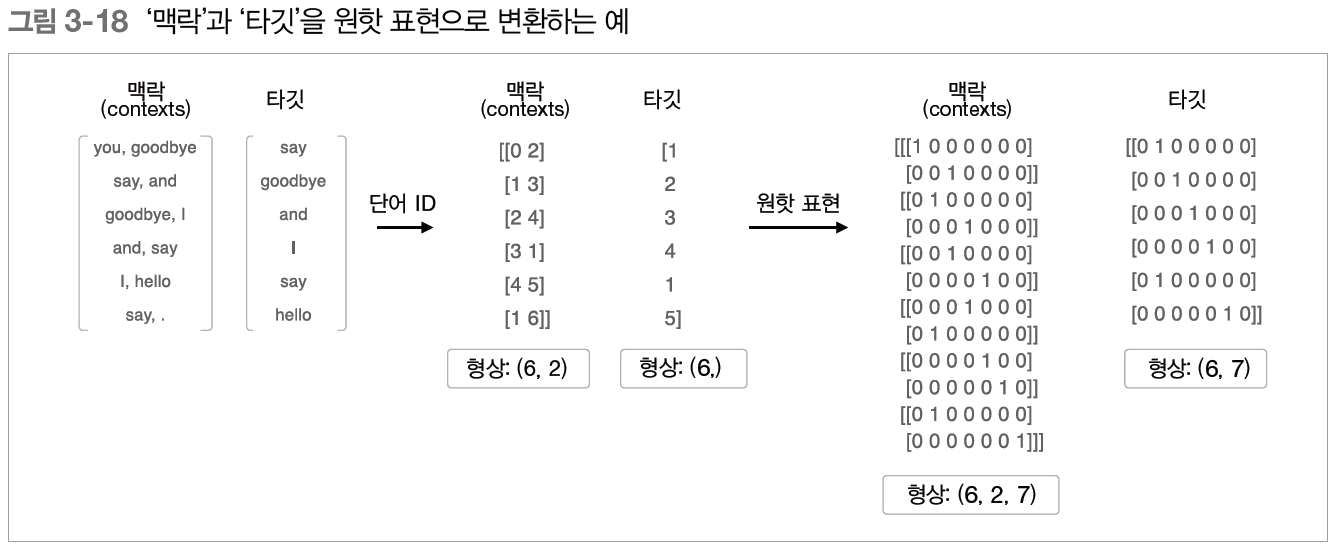

In [70]:
Image("9.png",width=1000, height=800)

In [2]:
def forward(self, contexts, target):            # contexts는 3차원 넘파이배열(6,2,7)
                                                # 0번째 차원은 한 문장안에 들어있는 모든 타깃에 대해 살펴봐야 하는 전체 맥락쌍의 수 
                                                # 1번째 차원은 타깃 단어당 살펴보는 맥락단어의 수(윈도우 크기)
                                                # 2번째 차원은 원핫 벡터 차원수 
    h0 = self.in_layer0.forward(contexts[:, 0]) # 전체 맥락쌍에서 타깃 단어의 왼쪽 맥락단어를 입력값으로 주고 Win과 Matmul 
    h1 = self.in_layer0.forward(contexts[:, 1]) # 타깃 단어의 오른쪽 맥락단어와 가중치 행렬 곱
    h = (h0 + h1) * 0.5                         # 전체 입력값 평균 
    score = self.out_layer.forward(h)           # 출력층 score
    loss = self.loss_layer.forward(score, target) # softmax를 통과시킨 후 크로스엔트로피로스 계산한 결과 
    return loss    

In [71]:
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]])

In [72]:
contexts[:, 0]

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

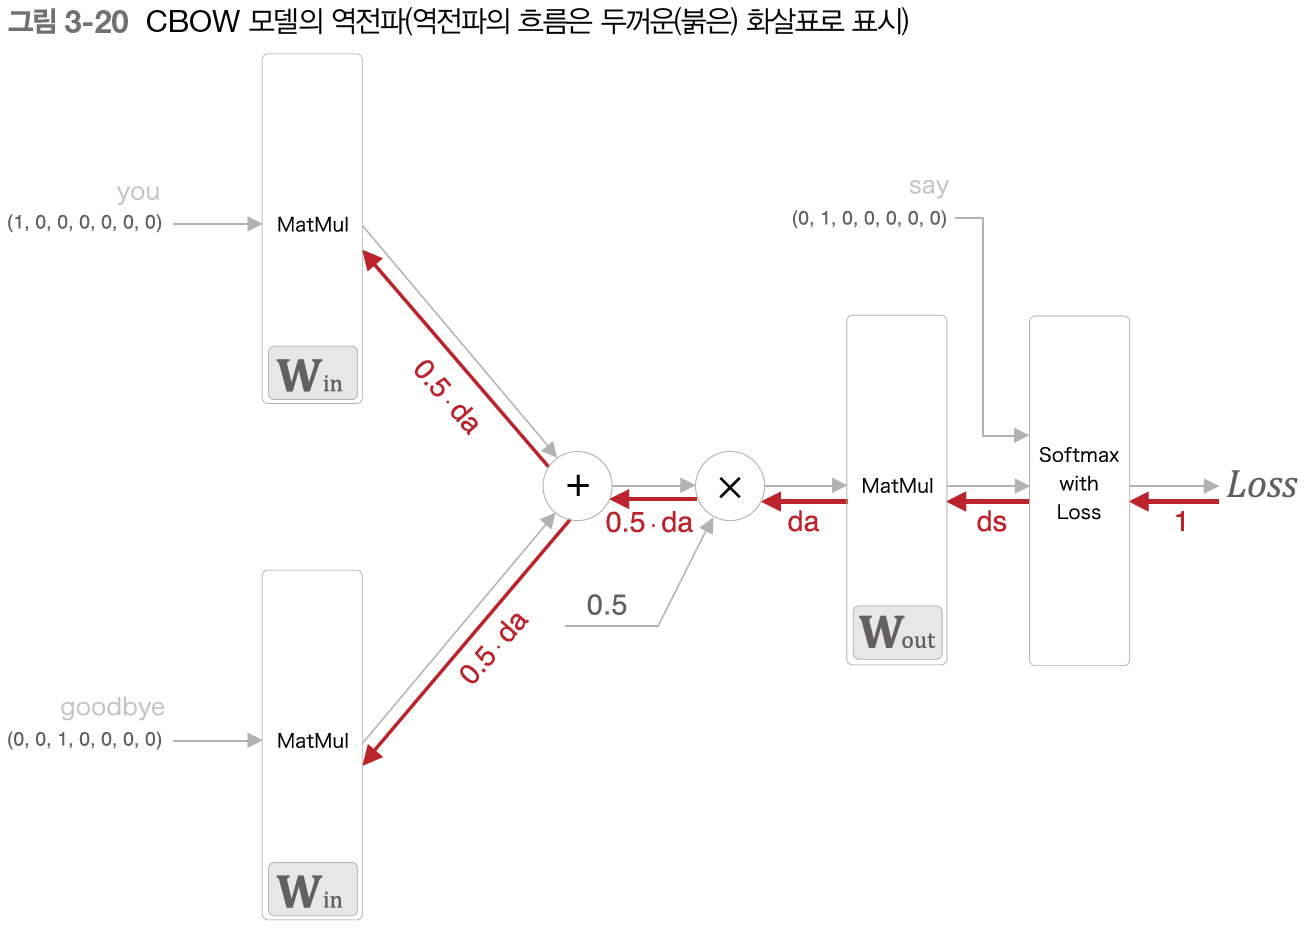

In [74]:
Image("10.png",width=800, height=600)

In [3]:
def backward(self, dout=1):
    ds = self.loss_layer.backward(dout)
    da = self.out_layer.backward(ds)
    da *= 0.5
    self.in_layer1.backward(da)
    self.in_layer0.backward(da)
    return None

# 3) 학습코드 구현

In [13]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)  # 가중치 행렬 형상 7 x 5의 의미 : 단어 하나당 5차원의 CBOW 밀집 벡터를 얻게 된다는 뜻  
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 315 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 316 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 317 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 318 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 319 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 320 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 321 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 322 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 323 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 324 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 325 |  반복 1 / 2 | 시간 0[s] | 손실 1.00
| 에폭 326 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 327 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 328 |  반복 1 / 2 | 시간 0[s] | 손실 0.94
| 에폭 329 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 330 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 331 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 332 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 333 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 334 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 335 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 336 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 337 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 338 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 339 |  반복 1

| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 635 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 636 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 637 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 638 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 639 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 640 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 641 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 642 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 643 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 644 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 645 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 646 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 651 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 652 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 657 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 658 |  반복 1

| 에폭 918 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 919 |  반복 1 / 2 | 시간 1[s] | 손실 0.45
| 에폭 920 |  반복 1 / 2 | 시간 1[s] | 손실 0.68
| 에폭 921 |  반복 1 / 2 | 시간 1[s] | 손실 0.43
| 에폭 922 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 923 |  반복 1 / 2 | 시간 1[s] | 손실 0.68
| 에폭 924 |  반복 1 / 2 | 시간 1[s] | 손실 0.49
| 에폭 925 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 926 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 927 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 928 |  반복 1 / 2 | 시간 1[s] | 손실 0.49
| 에폭 929 |  반복 1 / 2 | 시간 1[s] | 손실 0.70
| 에폭 930 |  반복 1 / 2 | 시간 1[s] | 손실 0.39
| 에폭 931 |  반복 1 / 2 | 시간 1[s] | 손실 0.67
| 에폭 932 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 933 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 934 |  반복 1 / 2 | 시간 1[s] | 손실 0.38
| 에폭 935 |  반복 1 / 2 | 시간 1[s] | 손실 0.64
| 에폭 936 |  반복 1 / 2 | 시간 1[s] | 손실 0.67
| 에폭 937 |  반복 1 / 2 | 시간 1[s] | 손실 0.45
| 에폭 938 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 939 |  반복 1 / 2 | 시간 1[s] | 손실 0.44
| 에폭 940 |  반복 1 / 2 | 시간 1[s] | 손실 0.75
| 에폭 941 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 942 |  반복 1

C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\philosucker\anaconda3\envs\philosucker\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phi

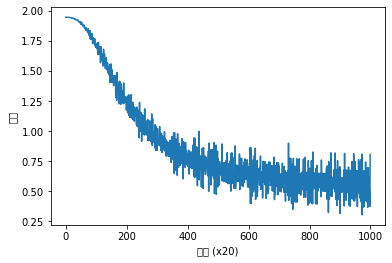

In [14]:
trainer.plot()

In [15]:
word_vecs = model.word_vecs                 # word_vecs 는 Win  7x5 가중치 행렬 
for word_id, word in id_to_word.items():    # vocab에서 단어 Id와 단어를 꺼내고 
    print(word, word_vecs[word_id])         # 단어에 대해서 가중치행렬의 각 행벡터를 위에서부터 하나씩 꺼내 출력한다.

you [ 0.99336165 -1.0558252  -1.0335008  -1.2853796  -1.2075728 ]
say [-1.1813283   1.1871171   1.1912987  -0.02820184  0.13524187]
goodbye [ 0.7973419  -0.6796704  -0.78009284 -0.6691904  -0.75561506]
and [-0.95489246  0.9868278   1.0166458  -1.7321044   1.5512617 ]
i [ 0.79097223 -0.6762795  -0.79347897 -0.6416018  -0.7274591 ]
hello [ 0.9917268 -1.05869   -1.0335046 -1.2959466 -1.2179023]
. [-1.0893145  1.1026965  1.0083479  1.3860751 -1.4764721]


CBOW가 하는 일은 맥랑을 주면 타깃단어가 출현할 확률을 출력하는 것이다   

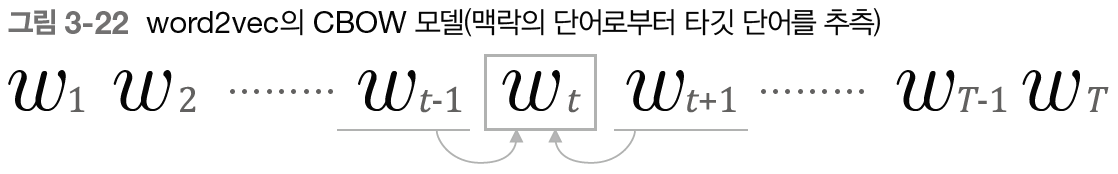

In [17]:
Image("11.png",width=800, height=600)

이걸 수식으로 쓰면 사후 확률로 표현할 수 있다.    
P(A|B) B라는 정보가 주어졌을 때 A가 일어날 확률   
Wt-1, Wt+1이 동시에 주어졌을 때 Wt가 일어날 확률

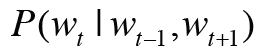

In [19]:
Image("12.png")

CBOW는 위 식을 모델링하고 있는 것이다. 

In [ ]:
위 식을 사용하면 CBOW의 손실함수도 표현해낼 수 있다.

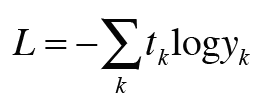

In [21]:
Image("13.png")

크로스 엔트로피 오차식에서 yk는 k번째 해당하는 사건이 일어날 확률, tk는 정답레이블이며 원핫벡터로 표현된다

CBOW에서 정답은 Wt가 발생하는 것이므로 Wt에 해당하는 원소만 1이고 나머지는 0이된다.    
이제 다음과 같은 샘플 데이터 하나에 대한 손실함수 식을 유도해낼 수 있다.

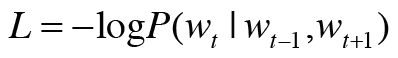

In [22]:
Image("14.png")

### 확률에 로그를 취한다음 마이너스를 붙인것   
### 이를 음의 로그 가능도 negative log likelihood라고 한다

위 식을 말뭉치 전체로 확장하면 다음 식이 된다.

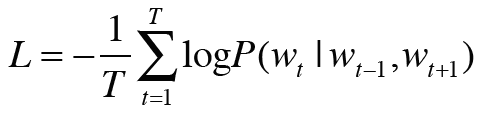

In [23]:
Image("15.png")

# Skip-gram 모델

스킵그램 모델의 입력층은 하나, 출력층은 맥락의 수만큼 존재   
   
      따라서 각 출력층에서는 개별적으로 손실을 구하고 
      이 개별 손실들을 모두 더한 값을 최종 손실로 한다

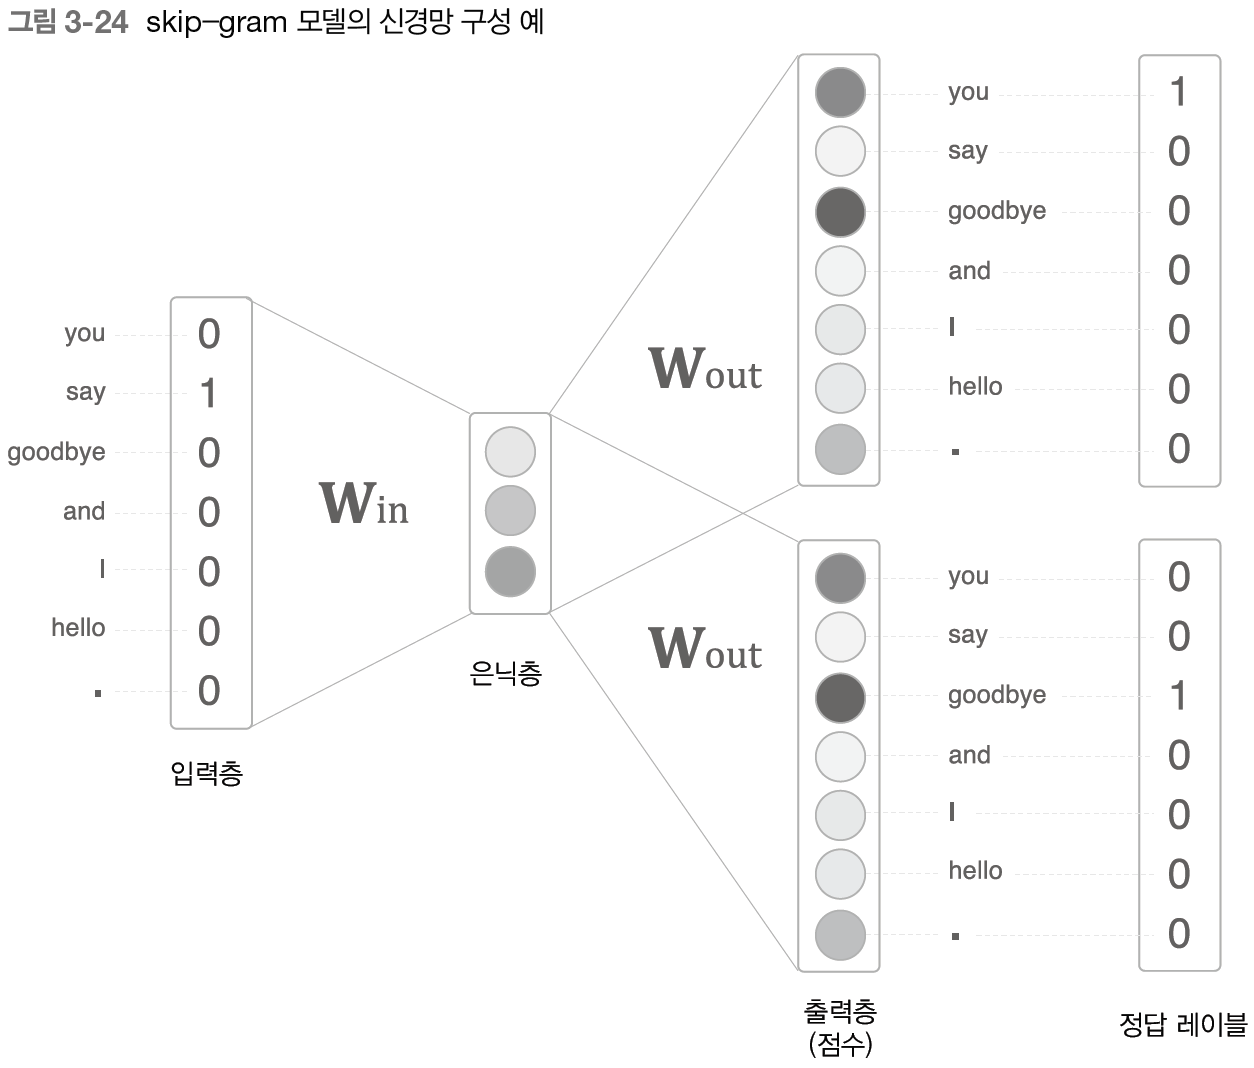

In [4]:
Image("16.png",width=800, height=600)

스킵그램 모델을 확률로 나타내면 다음과 같다. Wt가 주어졌을 때 Wt-1과 Wt+1이 동시에 일어날 확률

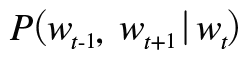

In [5]:
Image("17.png")

스킵그랩은 위 식을 모델링하는 것이다.   
위 식은 맥락 단어들 사이에 관련성이 없다고 가정했을 때(조건부 독립이라고 가정했을 때) 다음과 같이 분해된다

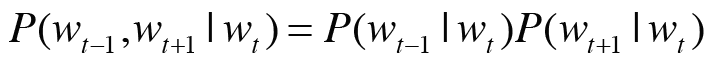

In [6]:
Image("18.png")

위 식을 교차엔트로피오차에 적용하면 스킵그램의 손실함수를 유도할 수 있다

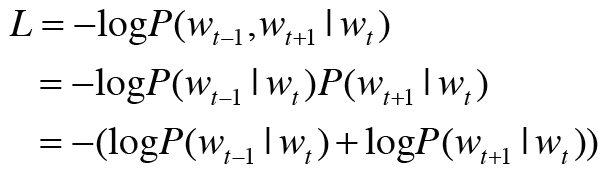

In [7]:
Image("19.png")

위 식에서 볼 수 있듯이 스킵그램의 손실함수는 맥락별 손실을 구한 다음 모두 더한다.   
샘플 데이터 하나짜리의 위 손실함수를 말뭉치 전체로 확장하면 아래와 같다

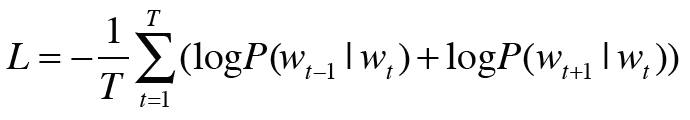

In [8]:
Image("20.png")

말뭉치가 커질수록   
저빈도 단어나 유추문제의 성능 면에서   
단어분산표현의 정밀도 면에서   
skip-gram이 더 뛰어나다

학습속도는 cbow가 더 빠르다   
skip-gram에서는 손실을 맥락 수만큼 구해야 해서 계산 비용이 커진다

# Skip-gram 코드 구현

In [21]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None
